# Hyotesis 11 and 12

### H11: The delay time changes according to the state of delivery
### H12: The delay time is related to the product category

In [122]:
from pyspark.sql import SparkSession, functions as F

In [123]:
spark = SparkSession.builder.getOrCreate()

In [124]:
orders_df = spark.read \
                 .option('quote', '\"') \
                 .option('escape', '\"') \
                 .csv('./dataset/olist_orders_dataset.csv', header=True, multiLine=True)

customer_df = spark.read \
                 .option('quote', '\"') \
                 .option('escape', '\"') \
                 .csv('./dataset/olist_customers_dataset.csv', header=True, multiLine=True)

orders_df.printSchema()
customer_df.printSchema()

df = orders_df.join(customer_df, orders_df.customer_id == customer_df.customer_id)

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_approved_at: string (nullable = true)
 |-- order_delivered_carrier_date: string (nullable = true)
 |-- order_delivered_customer_date: string (nullable = true)
 |-- order_estimated_delivery_date: string (nullable = true)

root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)



In [125]:
df.limit(5).toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP


In [126]:
late_df = df.filter(F.col('order_delivered_customer_date') > F.col('order_estimated_delivery_date'))
late_df.toPandas()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d2b091571da224a1b36412c18bc3bbfe,d699688533772c15a061e8ce81cb56df,04001,sao paulo,SP
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12 00:00:00,3a874b4d4c4b6543206ff5d89287f0c3,a25d5f94840d3c6a1a49f271ed83f4ec,21715,rio de janeiro,RJ
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20 00:00:00,5f16605299d698660e0606f7eae2d2f9,92fd8aa5948e20c43a014c44c025c5e1,77480,alvorada,TO
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21 00:00:00,c7340080e394356141681bd4c9b8fe31,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02 00:00:00,684fa6da5134b9e4dab731e00011712d,ddf60e20e6e262e2136801ce5cd628b0,49030,aracaju,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16 00:00:00,6f83c71b6c044fb156d697d4130fe9b5,f690f0caffab80b6f849f08ba1692925,09330,maua,SP
7823,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02 00:00:00,7f3bd6c94d2daf7b6462d1a894a775b4,4b855cb19adce3763ce1af3acc2aae0b,03122,sao paulo,SP
7824,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31 00:00:00,ad312389a098ceff46ce92c4595c06d0,a3983b8b6b679c9f645e6ef9517ac98d,14802,araraquara,SP
7825,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09 00:00:00,82ddfcf9438b0cd1117b55ac33184df8,397cd1affbb66fa8f76e8ac24685440a,13272,valinhos,SP


In [127]:
aux_df = late_df.select(F.col('order_estimated_delivery_date').alias('estimated_date'),
                        F.col('order_delivered_customer_date').alias('deliver_date'),
                        F.col('customer_state').alias('state'))

aux_df = aux_df.withColumn('delay_in_days', F.datediff(F.col('deliver_date'), F.col('estimated_date')))
aux_df.show()

+-------------------+-------------------+-----+-------------+
|     estimated_date|       deliver_date|state|delay_in_days|
+-------------------+-------------------+-----+-------------+
|2017-09-28 00:00:00|2017-10-09 22:23:46|   SP|           11|
|2018-03-12 00:00:00|2018-03-21 22:03:54|   RJ|            9|
|2018-03-20 00:00:00|2018-03-20 00:59:25|   TO|            0|
|2017-12-21 00:00:00|2017-12-28 18:59:23|   SP|            7|
|2018-04-02 00:00:00|2018-04-03 13:28:46|   SE|            1|
|2017-03-30 00:00:00|2017-04-06 13:37:16|   SP|            7|
|2017-12-11 00:00:00|2017-12-28 19:43:00|   RJ|           17|
|2018-08-02 00:00:00|2018-08-03 19:28:47|   SP|            1|
|2017-12-22 00:00:00|2018-01-23 21:38:52|   RJ|           32|
|2017-12-19 00:00:00|2018-01-20 13:42:22|   RJ|           32|
|2018-03-16 00:00:00|2018-03-22 00:03:53|   MG|            6|
|2018-03-09 00:00:00|2018-03-09 21:52:36|   SP|            0|
|2018-06-06 00:00:00|2018-06-07 13:58:42|   MG|            1|
|2018-08

In [128]:
aux_df = aux_df.groupBy('state').avg().orderBy('avg(delay_in_days)', ascending=False)

In [129]:
aux_df = aux_df.withColumn('avg(delay_in_days)', F.round(aux_df['avg(delay_in_days)'], 2))
aux_df.show(27)

+-----+------------------+
|state|avg(delay_in_days)|
+-----+------------------+
|   AP|             48.33|
|   RR|              36.4|
|   AM|             20.17|
|   AC|             18.67|
|   SE|              16.2|
|   CE|             13.63|
|   RN|             12.49|
|   RJ|             12.15|
|   PA|             11.62|
|   PI|             11.59|
|   PE|             10.65|
|   BA|             10.42|
|   ES|              9.91|
|   PB|              9.79|
|   MT|               9.4|
|   MA|              9.31|
|   GO|              9.09|
|   RS|              8.71|
|   AL|              8.54|
|   MS|               7.0|
|   SC|              6.99|
|   MG|              6.85|
|   PR|              6.73|
|   SP|              6.35|
|   DF|              5.95|
|   RO|              5.57|
|   TO|              5.03|
+-----+------------------+



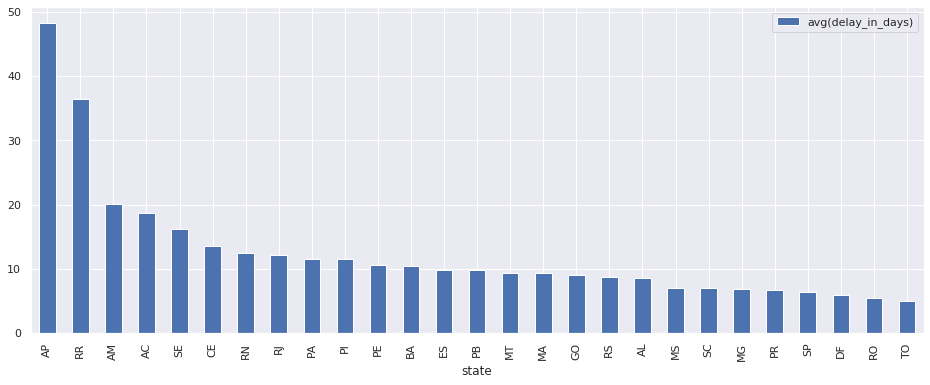

In [130]:
aux_df.toPandas().plot(kind='bar', x='state', figsize=(16, 6))

# Conclusion

## H11
### The hypotesis 11 is valid, as all states have different average delays

## H12
### The hypotesis 12 was discarded due to data inconsistency